In [269]:
#imports
import os
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [270]:
#defining path for train & test data
PATH = os.getcwd()
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [271]:
#defining image size, channels and number of classes

img_rows=28
img_cols=28
num_channel=1
num_epoch=20
num_classes = 10
print(data_dir_list)   #displaying list in data directory

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [272]:
#some preprocessing of images
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(28,28))
		img_data_list.append(input_img_resize)

#converting images into numpy array 
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
img_data= np.expand_dims(img_data, axis=1)
print (img_data.shape)
img_data=np.rollaxis(img_data,3,1)
img_data=np.rollaxis(img_data,3,1)
print (img_data.shape)

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9

(400, 28, 28)
(400, 1, 28, 28)
(400, 28, 28, 1)


In [273]:
#defining number of samples from shape of image data
num_of_samples = img_data.shape[0]
#creating labels for y_train and y_test
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:40]=0
labels[40:80]=1
labels[80:120]=2
labels[120:160]=3
labels[160:200]=4
labels[200:240]=5
labels[240:280]=6
labels[280:320]=7
labels[320:360]=8
labels[360:]=9

names = ['0','1','2','3','4','5','6','7','8','9']

Y = np_utils.to_categorical(labels, num_classes)
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

input_shape=img_data[0].shape	
print(input_shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28, 28, 1)
(320, 28, 28, 1)
(320, 10)
(80, 28, 28, 1)
(80, 10)


In [274]:
input_shape = (28,28,1)

#creating model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [275]:
#model compilatiion
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),metrics=['accuracy'])

In [276]:
#printing summary of model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [277]:
#defining path to save checkpoints
checkpoint_path = 'C:/Users/theycallmeBOT/Desktop/task/checkpoint/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

#creating checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=1)
#starting model training
hist = model.fit(X_train, y_train, batch_size=32, epochs=25, verbose=1, validation_data=(X_test, y_test), callbacks=[cp_callback])
print("The model has successfully trained")

#saving trained model
model.save('uas_digit_dataset_model.h5')
print("Saving the model as uas_digit_dataset_model.h5")

Epoch 1/25
10/10 [==============================] - 1s 27ms/step - loss: 2.2461 - accuracy: 0.1625 - val_loss: 1.7540 - val_accuracy: 0.5875

Epoch 00001: saving model to C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt
INFO:tensorflow:Assets written to: C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt\assets
Epoch 2/25
10/10 [==============================] - 0s 9ms/step - loss: 1.5530 - accuracy: 0.4719 - val_loss: 1.0057 - val_accuracy: 0.6875

Epoch 00002: saving model to C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt
INFO:tensorflow:Assets written to: C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt\assets
Epoch 3/25
10/10 [==============================] - 0s 11ms/step - loss: 1.0816 - accuracy: 0.6375 - val_loss: 0.6009 - val_accuracy: 0.8125

Epoch 00003: saving model to C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt
INFO:tensorflow:Assets written to: C:/Users/theycallmeBOT/Desktop/task/checkpoint\cp.ckpt\assets
Epoch 4/25
10/10 [==============

In [279]:
#printing validation loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.14936895668506622
Test accuracy: 0.9750000238418579


In [280]:
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    #inverting image
    #img = PIL.ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    print('\nPredicted Digit:  ', np.argmax(res) , ' \nPrediction Accuracy:', round(100*max(res), 4), '%')
    #return np.argmax(res), 100*max(res)


Predicted Digit:   4  
Prediction Accuracy: 99.9924 %


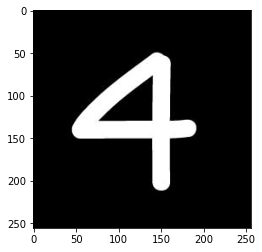

In [281]:
img_path1 = 'C:/Users/theycallmeBOT/Desktop/task/my_handwritten_digits/four2-01.png'
img_path2 = 'C:/Users/theycallmeBOT/Desktop/task/data/9/9_32.png'
test_image = Image.open(img_path1)
#test_image.show()
plt.imshow(test_image, cmap='gray')
predict_digit(test_image)